<a href="https://colab.research.google.com/github/tarunmishra9838/Machine-learning/blob/main/project_on_titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train_df = pd.read_csv('/content/archive (1).csv')
test_df = pd.read_csv('/content/archive (1).csv')
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("\nTrain Data Columns:", train_df.columns.tolist())
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())


Train Data Shape: (418, 12)
Test Data Shape: (418, 12)

Train Data Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Missing Values in Train Data:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


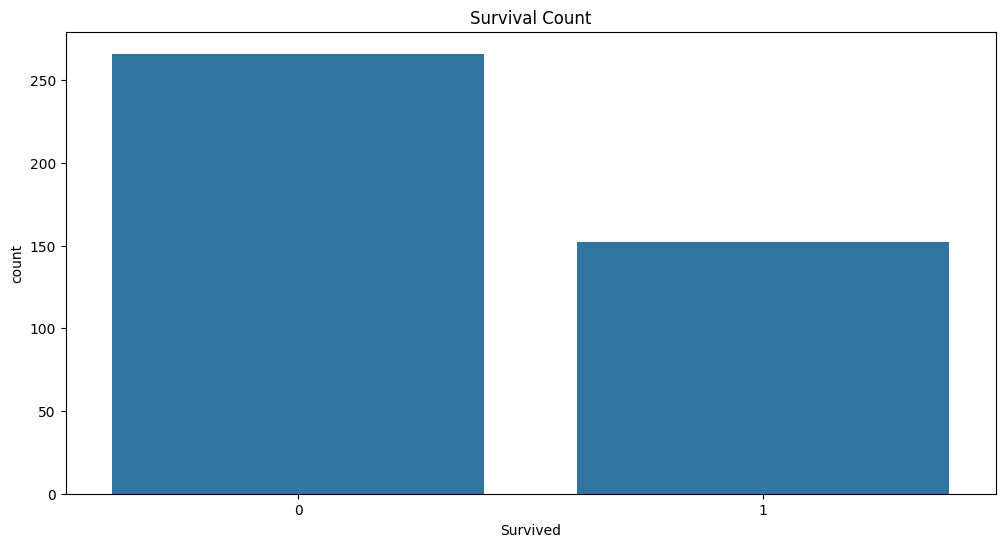

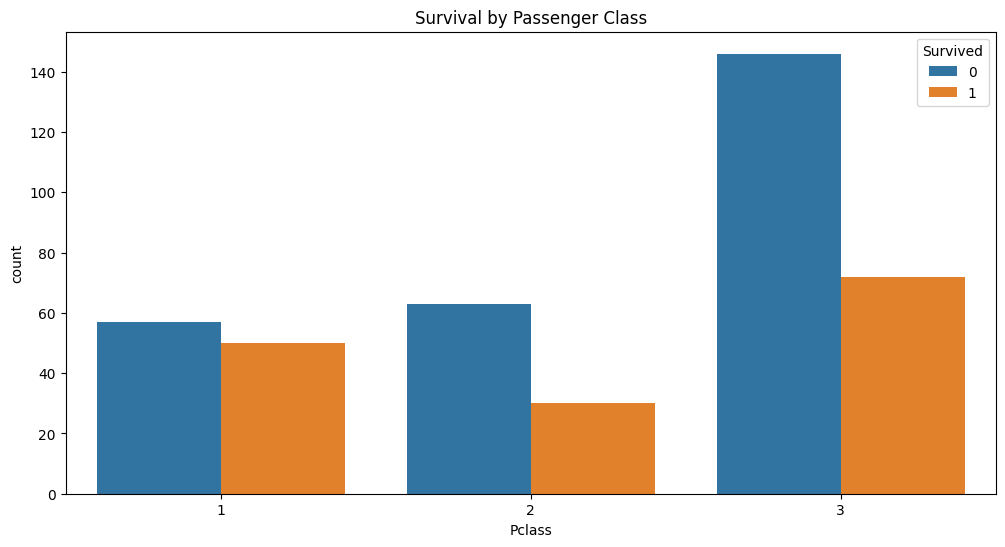

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()


In [ ]:
def preprocess_data(df):
    df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = le.fit_transform(df['Embarked'])
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

    return df


In [ ]:
train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)


In [ ]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)


In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_val)


In [ ]:
print("\nModel Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))



Model Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        49

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)



Feature Importance:
      Feature  Importance
1         Sex    0.858457
5        Fare    0.046564
2         Age    0.029068
7  FamilySize    0.020639
8     IsAlone    0.012678
0      Pclass    0.010977
6    Embarked    0.008220
4       Parch    0.007588
3       SibSp    0.005809


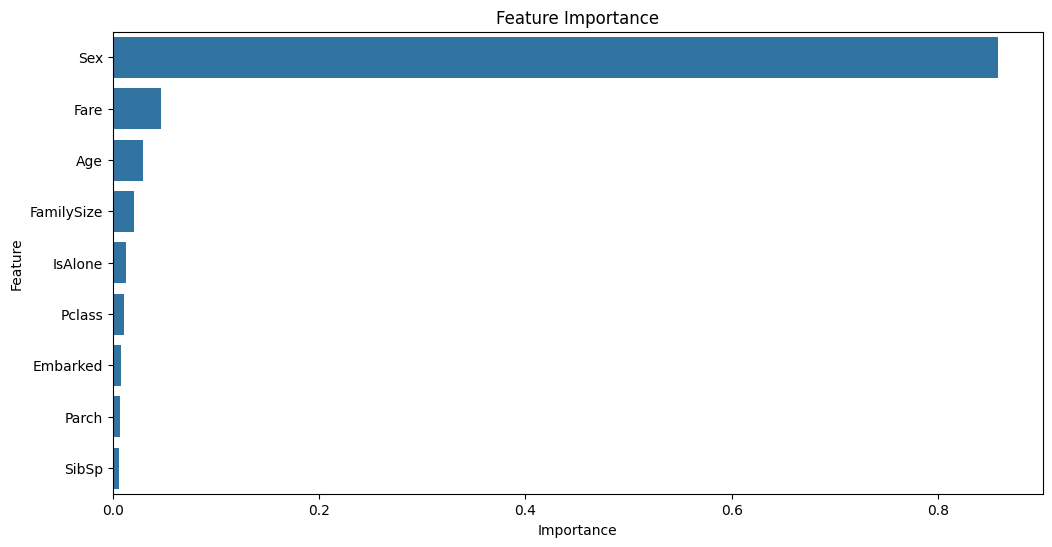

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


In [ ]:
model.fit(X, y)

RandomForestClassifier()

In [ ]:
model.score(X,y)

1.0